In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

import sys, sklearn
np.random.seed(42)

print("Python:", sys.version.split()[0])
print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)
print("scikit-learn:", sklearn.__version__)

Python: 3.12.4
NumPy: 1.26.4
Pandas: 2.2.2
scikit-learn: 1.4.2


## 1.1 Fundamentos de la técnica

El método **k-Nearest Neighbors (kNN)** clasifica un nuevo ejemplo según las **etiquetas de sus k vecinos más cercanos** en el espacio de características.  
No construye una función de decisión explícita: guarda los datos y **calcula distancias** (por lo general, **euclidianas**) al momento de predecir.

Es un algoritmo **simple, interpretable y eficaz** cuando las relaciones entre las variables son **locales o no lineales**.

---

## 1.2 Modelo Matemático

Sea un conjunto de entrenamiento:

\[
X = \{(x_i, y_i)\}_{i=1}^{n}, \quad x_i \in \mathbb{R}^m
\]

Para una nueva muestra \( x^* \):

1. Calculamos las distancias \( d(x^*, x_i) \)  
2. Seleccionamos los *k* menores valores → los **vecinos más cercanos**  
3. La clase predicha es la **moda** de las etiquetas de esos vecinos:

\[
\hat{y}^* = \text{mode}\{y_i : x_i \in kNN(x^*)\}
\]

---

## 1.3 Librerías, clases y funciones empleadas

| Módulo | Propósito |
|--------|------------|
| `sklearn.neighbors.KNeighborsClassifier` | Implementación del kNN. Parámetros principales: `n_neighbors`, `metric`, `weights`. |
| `train_test_split` | Divide los datos en entrenamiento y prueba. |
| `StandardScaler` | Normaliza variables numéricas. |
| `accuracy_score`, `confusion_matrix` | Métricas de evaluación. |
| `ConfusionMatrixDisplay` | Visualiza la matriz de confusión. |
    |


In [3]:
'''
1.4 Pipeline — paso a paso
1.4.1 Preprocesamiento

Cargamos el dataset Iris, realizamos estadísticas básicas y visualizamos relaciones entre variables.
'''
iris = load_iris(as_frame=True)
df = iris.frame
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# Análisis estadístico previo:
print("Resumen estadístico:\n")
print(df.describe())


Resumen estadístico:

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


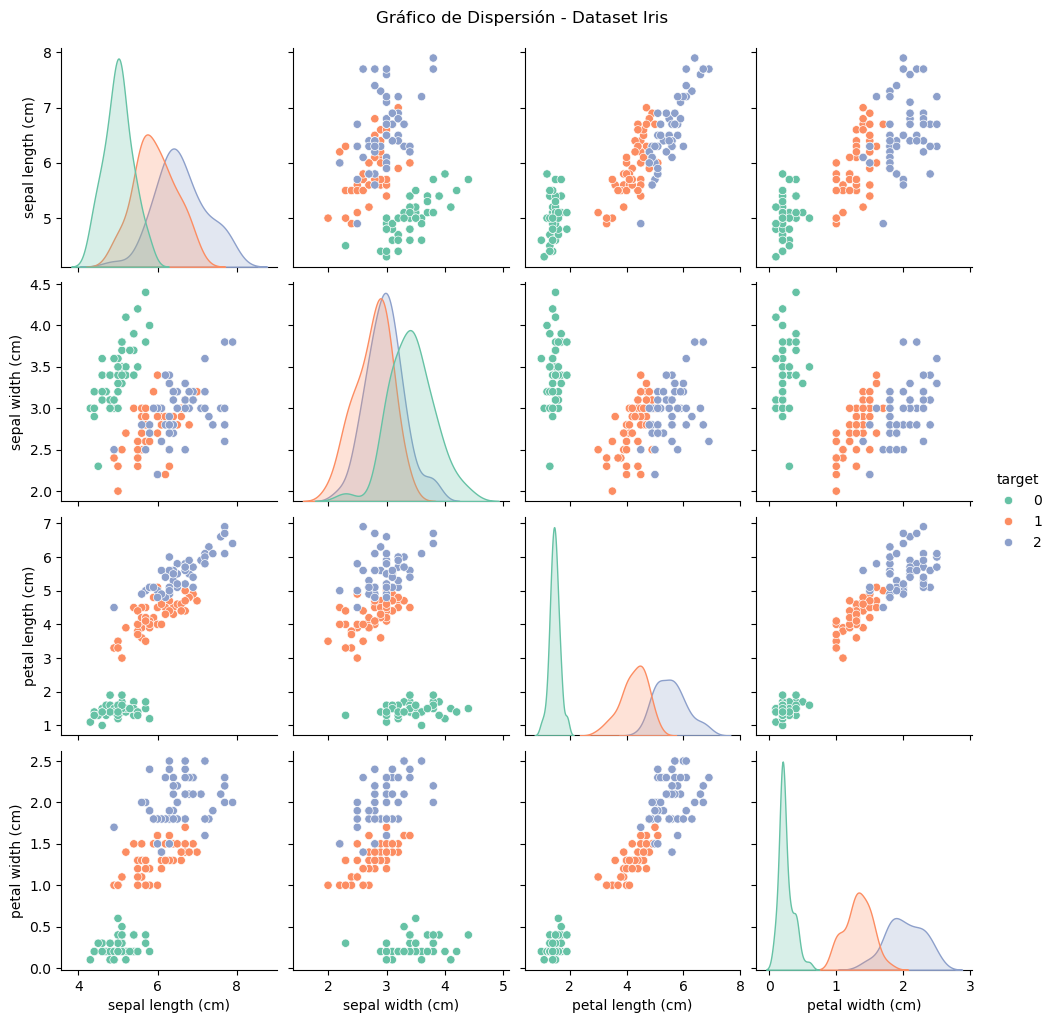

In [6]:
#Gráfico de dispersión (pairplot):
sns.pairplot(df, hue="target", diag_kind="kde", palette="Set2")
plt.suptitle("Gráfico de Dispersión - Dataset Iris", y=1.02)
plt.show()


In [7]:
'''
1.4.2 Feature Engineering

Seleccionamos las variables de entrada (X) y la salida (y).
Usamos todas las características numéricas del conjunto.
'''
X = df[iris.feature_names].values
y = df["target"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
'''
1.4.3 Entrenamiento y Predicción

Dividimos los datos, entrenamos el modelo y creamos una función para clasificar patrones nuevos.
'''
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y
)

knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knn.fit(X_train, y_train)
print("Modelo kNN entrenado ✅")


Modelo kNN entrenado ✅


In [11]:
#Función de predicción personalizada:
def clasificar_patron(modelo, scaler, nuevo_patron):
    """
    Recibe un vector de características y devuelve la clase predicha.
    """
    patron = np.array(nuevo_patron).reshape(1, -1)
    patron_norm = scaler.transform(patron)
    clase_pred = modelo.predict(patron_norm)[0]
    nombre = iris.target_names[clase_pred]
    print(f"Patrón: {nuevo_patron} → Clase predicha: {nombre}")
    return nombre

# Ejemplo de predicción
clasificar_patron(knn, scaler, [5.1, 3.5, 1.4, 0.2])


Patrón: [5.1, 3.5, 1.4, 0.2] → Clase predicha: setosa


'setosa'

Accuracy: 0.9211


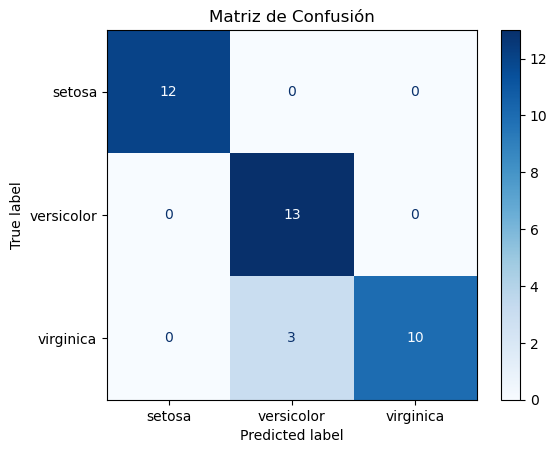

In [12]:
#1.4.4 Evaluación del Modelo
#Calculamos Accuracy y mostramos la Matriz de Confusión.
y_pred = knn.predict(X_test)

# Métricas
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=iris.target_names)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión")
plt.show()


##  Evaluación del modelo 

- **Accuracy:** mide el **porcentaje global de aciertos** del modelo, es decir, la proporción de predicciones correctas sobre el total de muestras evaluadas.  
- **Matriz de confusión:** muestra las **clases verdaderas frente a las predichas**, permitiendo visualizar qué categorías se confunden con mayor frecuencia.  
  Es especialmente útil para detectar sesgos o desbalances entre clases.

---

##  Referencias Bibliográficas 

- **Cover, T. & Hart, P. (1967).** *Nearest Neighbor Pattern Classification.* IEEE Transactions on Information Theory.  
- **Bishop, C. M. (2006).** *Pattern Recognition and Machine Learning.* Springer.  
- **Documentación oficial:** [Scikit-learn — k-Nearest Neighbors](https://scikit-learn.org/stable/modules/neighbors.html)hbors.html)
